In [1]:
import matplotlib.pyplot as plt      
from mpl_toolkits import mplot3d
import os
import sys
import glob
import time
import shutil
import gym
from gym import error, spaces, utils
import numpy as np
import math
from pathlib import Path

In [2]:
import pybullet
import gym_fish
from gym_fish.envs.lib import pyflare as fl

In [3]:
os.chdir(Path(os.getcwd()+"/../").resolve())
print(os.getcwd())

/home/liuwj/codes/FishEnvPy/rl_test_new


In [4]:
p_json = str(Path("./py_data/jsons/paths/line.json").resolve())
print(p_json,Path("./py_data/jsons/paths/line.json").exists())

/home/liuwj/codes/FishEnvPy/rl_test_new/py_data/jsons/paths/line.json True


## Env generation

In [6]:
env_test=gym.make('Walker2DBulletEnv-v0')


UnregisteredEnv: No registered env with id: Walker2DBulletEnv-v0

In [ ]:
import gym_fish
from gym_fish.envs.lib import pyflare as fl
def collect_ob_ac(env,model,path_json,fluid_json,rigid_json,n_episodes=1):
    actions = []
    observations = []
    rewards = []
    infos = []
    episode_returns = np.zeros((n_episodes,))
    episode_starts = []
    
    ep_idx = 0
    obs = env.reset()
    episode_starts.append(True)
    reward_sum = 0.0
    idx = 0
    # state and mask for recurrent policies
    state, mask = None, None
    
    while ep_idx < n_episodes:
        observations.append(obs)
        obs, reward, done, info = env.step(action)
        infos.append(info)
        actions.append(action)
        rewards.append(reward)
        episode_starts.append(done)
        reward_sum += reward
        idx += 1
        if done:
            orientation_pd_control.reset()
            obs = env.reset()
            # Reset the state in case of a recurrent policy
            state = None
            episode_returns[ep_idx] = reward_sum
            reward_sum = 0.0
            ep_idx += 1
            
    if isinstance(env.observation_space, spaces.Box):
        observations = np.concatenate(observations).reshape((-1,) + env.observation_space.shape)
    elif isinstance(env.observation_space, spaces.Discrete):
        observations = np.array(observations).reshape((-1, 1))
    if isinstance(env.action_space, spaces.Box):
        actions = np.concatenate(actions).reshape((-1,) + env.action_space.shape)
    elif isinstance(env.action_space, spaces.Discrete):
        actions = np.array(actions).reshape((-1, 1))
    rewards = np.array(rewards)
    episode_starts = np.array(episode_starts[:-1])
    assert len(observations) == len(actions)
    numpy_dict = {
        'actions': actions,
        'obs': observations,
        'rewards': rewards,
        'episode_returns': episode_returns,
        'episode_starts': episode_starts
    }  # type: Dict[str, np.ndarray]
    
    
    for key, val in numpy_dict.items():
        print(key, val.shape)
    np.savez(rl_data_folder+rl_data_all_name, **numpy_dict)
    env.close()
    return infos

In [ ]:
data = np.load(rl_data_folder+rl_data_all_name)

## local simulation check

In [6]:
start_time = time.time()
env_test.step([0])
end_time = time.time()
print(end_time-start_time)
# env_test.save_data( save_fluid=True, save_objects=True,frame_num=0)
# check path, check object head and position ,data saving 

0.01962137222290039


## random action test

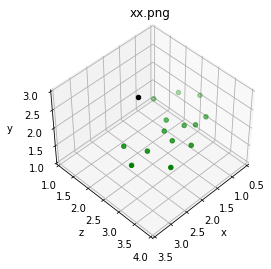

0.48405933380126953


In [7]:

import random
simTime = 10
i = 0
start_time = time.time()
env_test.step(0)
# while env_test.rigid_data.rigidWorld.time <= simTime:
#     print(env_test.rigid_data.rigidWorld.time,end='\r')
#     env_test.stepSave([random.uniform(-1,1)])
    #env_test.save_data( save_fluid=True, save_objects=True,frame_n
    
env_test.plot3d(title="xx.png",fig_name="xxx.png")
end_time = time.time()
print(end_time-start_time)